In [1]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

# TODO set up axis
scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
)

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Base/5.0/user.config.json'
[0.134s] [ext: omni.kit.async_engine-0.0.3] startup
[0.732s] [ext: omni.metrics.core-0.0.3] startup
[0.732s] [ext: omni.client.lib-1.1.0] startup
[0.836s] [ext: omni.blobkey-1.1.2] startup
[0.837s] [ext: omni.stats-1.0.1] startup
[0.840s] [ext: omni.datastore-0.0.0] startup
[0.897s] [ext: omni.client-1.3.0] startup
[1.034s] [ext: omni.ujitso.default-1.0.0] startup
[1.040s] [ext: omni.hsscclient-1.1.2] startup
[1.053s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[1.057s] [ext: omni.assets.plugins-0.0.0] startup
[1.061s] [ext: omni.gpu_foundation-0.0.0] startup
[1.128s] [ext: carb.windowing.plugin

2025-10-17T08:20:49Z [14,245ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-17T08:20:49Z [14,245ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-17T08:20:49Z [14,390ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


[14.300s] app ready


In [2]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


# panda = await load_urdf(
#     "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
#     scene=scene, 
#     fix_root_link=True,
# )


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])



In [3]:
cam = await build_camera(scene=scene)
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=panda.link_poses[..., -1].p)
cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)

Module robotodo.engines.isaac.sensors f0dd58f load on device 'cuda:0' took 146.85 ms  (cached)


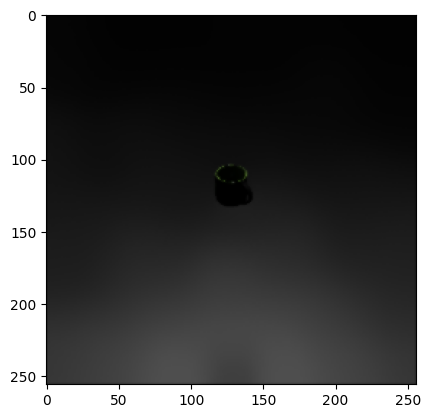

In [4]:
import matplotlib.pyplot as plt

cam.pose = Pose.from_lookat([2, 2, 2], p_target=mug.pose.p)
plt.imshow((await cam.read_rgba())[0].cpu())

2025-10-17T08:20:56Z [21,285ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_01.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


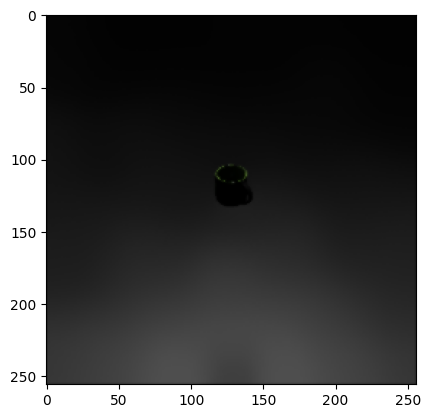

: 

In [ ]:
import matplotlib.pyplot as plt

await scene.step()
cam.pose = Pose.from_lookat([2, 2, 2], p_target=mug.pose.p)
plt.imshow((await cam.read_rgba())[0].cpu())